# Exploratory Data Analysis (EDA)

In [1136]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

import os
import dotenv

import requests

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

dotenv.load_dotenv(".env")

True

In [1137]:
df = pd.read_csv("datos/api_rent_madrid.csv", sep = ";")

In [1138]:
df.columns

Index(['propertyCode', 'numPhotos', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'country', 'latitude', 'longitude', 'showAddress',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'externalReference', 'floor', 'district', 'neighborhood', 'hasLift',
       'parkingSpace', 'labels', 'newDevelopmentFinished'],
      dtype='object')

Podemos omitir aquellas columnas con un solo valor único, ya que estas no aportan información alguna.

In [1139]:
uniques_dtypes = pd.concat([pd.DataFrame(df.nunique().sort_values(), columns=["N uniques"]), pd.DataFrame(df.dtypes, columns=["dtype"])],
                            axis=1)
uniques_dtypes

,N uniques,dtype
topNewDevelopment,1,object
superTopHighlight,1,object
operation,1,object
hasStaging,1,object
labels,1,object
country,1,object
hasVideo,2,object
hasLift,2,object
has360,2,object
has3DTour,2,object


In [1140]:
columnas_un_valor = df.columns[(df.nunique() == 1).reset_index().loc[:,0]]

In [1141]:
df.drop(columns=columnas_un_valor, inplace=True)

Además comprobaremos si hay duplicados

In [1142]:
df.duplicated().sum()

8

Tenemos 8 duplicados, así que podemos dropearlos.

In [1143]:
df.drop_duplicates(inplace=True)

In [1144]:
df.reset_index(inplace=True, drop=True)

Vamos a comenzar echándole un vistazo a nuestros datos.

In [1145]:
df.head()

,propertyCode,numPhotos,price,propertyType,size,exterior,rooms,bathrooms,address,province,municipality,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,externalReference,floor,district,neighborhood,hasLift,parkingSpace,newDevelopmentFinished
0,98903350,33,550.0,chalet,371.0,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,400.675.955,-38.225.891,False,40116,UGENA VILLAGE INMOBILIARIA GESTIONA en exclusi...,False,good,False,1.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Numancia de la Sagra', 'title': ...",False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,60.0,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,13.0,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN
2,88363329,21,750.0,flat,70.0,True,2,1,Gregorio izquierdo,Madrid,San Sebastián de los Reyes,405.500.865,-36.278.085,False,16145,"Estupendo piso muy iluminado, recientemente re...",True,good,False,11.0,{'typology': 'flat'},"{'subtitle': 'Centro Urbano, San Sebastián de ...",True,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN
3,98621753,28,400.0,penthouse,67.0,True,2,2,Calle Madrid,Madrid,Villamanrique de Tajo,40.069.197,-3.241.383,False,55041,"A estrenar ático con piscina en Calle Madrid, ...",False,good,False,6.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Villamanrique de Tajo', 'title':...",False,False,True,90004,2,NaN,NaN,False,NaN,NaN
4,98222714,22,450.0,flat,89.0,False,2,1,Calle Arroyo,Toledo,Recas,400.536.974,-39.912.159,False,47186,REDPISO alquila esta vivienda situada en el mu...,False,good,False,5.0,{'typology': 'flat'},"{'subtitle': 'Recas', 'title': 'Piso en Calle ...",False,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN


Vemos que las latitudes están formateada de forma incorrecta. Las unidades de la latitud deben estar entre -90 y 90, por lo que vemos que ha aumentado un orden de magnitud en algunos de los casos (en la longitud pasa igual). Podemos reformatearlo con el formato correcto:

In [1146]:
df["latitude"] = df["latitude"].apply(lambda x: float(x.replace(".","")[:2] + "." + x.replace(".","")[2:]))
df["longitude"] = df["longitude"].apply(lambda x: float(x.replace(".","")[:2] + "." + x.replace(".","")[2:]))

Comprobemos que ahora están bien formateados con un simple describe.

In [1147]:
df[["latitude", "longitude"]].describe()

,latitude,longitude
count,442.000000,442.000000
mean,40.390311,-3.696168
std,0.182514,0.225706
min,39.933288,-4.334495
25%,40.303976,-3.776781
50%,40.406238,-3.696147
75%,40.481479,-3.602799
max,40.907397,-3.106727


Aparte de esto, a primera vista no vemos nada extraño. Continuemos separando las columnas de tipo numéricas de las de tipo objeto (no necesariamente categóricas).

In [1148]:
cat_cols = df.select_dtypes('O').columns
num_cols = df.select_dtypes('number').columns

In [1149]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
propertyCode,442.0,9.457326e+07,1.397475e+07,666696.000000,9.755039e+07,9.866265e+07,9.889432e+07,9.893968e+07
numPhotos,442.0,2.184842e+01,9.655147e+00,0.000000,1.500000e+01,2.100000e+01,2.800000e+01,7.200000e+01
price,442.0,6.729638e+02,8.396457e+01,340.000000,6.450000e+02,7.000000e+02,7.400000e+02,7.500000e+02
size,442.0,6.795928e+01,3.586773e+01,20.000000,4.625000e+01,6.200000e+01,8.000000e+01,3.710000e+02
rooms,442.0,1.696833e+00,9.751743e-01,0.000000,1.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00
bathrooms,442.0,1.205882e+00,4.371229e-01,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,442.0,4.039031e+01,1.825140e-01,39.933288,4.030398e+01,4.040624e+01,4.048148e+01,4.090740e+01
longitude,442.0,-3.696168e+00,2.257057e-01,-4.334495,-3.776781e+00,-3.696147e+00,-3.602799e+00,-3.106727e+00
distance,442.0,2.226639e+04,1.699127e+04,183.000000,7.089000e+03,2.000100e+04,3.485475e+04,5.991900e+04
priceByArea,424.0,1.194811e+01,5.369307e+00,1.000000,8.000000e+00,1.100000e+01,1.500000e+01,3.300000e+01


No vemos nada fuera de lo común. Puede que el rooms = 0 indique que el tipo de propiedad sea un estudio, por lo que no tiene habitaciones. 

El `priceByArea` podemos descartarlo ya que es una variable que deriva de otras dos, por lo que no aporta al análisis porque está directamente relacionado con otras variables independientes.

Además, el `propertyCode` no nos aportará nada en cuanto al entrenamiento del modelo, por lo que lo descartaremos también.

In [1150]:
df.drop(columns=["propertyCode", "priceByArea"], inplace=True)

In [1151]:
df[cat_cols].describe().T

,count,unique,top,freq
propertyType,442,6,flat,348
address,442,405,"Calle Valle de Ambles, 2",7
province,442,5,Madrid,353
municipality,442,96,Madrid,170
description,441,427,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,7
hasVideo,424,2,False,306
status,424,3,good,409
newDevelopment,424,2,False,411
detailedType,424,10,{'typology': 'flat'},336
suggestedTexts,424,395,"{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...",7


Aquí ya podemos ir viendo qué categorías podríamos descartar para nuestro análisis, como pueden ser `address` ,`description`, `suggestedTexts` y `externalReference`, que tienen muchos valores únicos y no será relevante a la hora de entrenar a nuestro modelo. También echando un vistazo a ``detailedType`` vemos que no aporta mucha más información que no aporte ya `propertyType`.

También habrá que gestionar los diccionarios contenidos en ``parkingSpace``.

In [1152]:
df.drop(columns=["address", "description", "suggestedTexts", "externalReference", "detailedType"], inplace=True)

Ahora sí, vamos a extraer datos de la info del parking.

In [1153]:
df["parkingSpace"].unique()

array([nan,
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 50.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 40.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 90.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}"],
      dtype=object)

Vemos que pueden ser nulos o contener 3 elementos diferentes: `hasParkingSpace`, `isParkingSpaceIncludedInPrice` y `parkingSpacePrice`.

Lo primero será convertir estas strings en diccionarios para poder procesarlos.

In [1154]:
def get_values_for_keys(data, keys):
    dict_final = {}
    
    for k in keys:
        if type(data) == float:
            dict_final[k] = np.nan
        else:
            try:
                dict_final[k] = eval(data)[k]
            except KeyError:
                dict_final[k] = np.nan
    return dict_final


In [1155]:
parking_data = df["parkingSpace"].apply(lambda x: get_values_for_keys(x,["hasParkingSpace", "isParkingSpaceIncludedInPrice", "parkingSpacePrice"]))

In [1156]:
parking_df = pd.DataFrame(list(parking_data))
parking_df.head()

,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,True,True,NaN


Vamos a ver cuántos no nulos tenemos:

In [1157]:
parking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hasParkingSpace                134 non-null    object 
 1   isParkingSpaceIncludedInPrice  134 non-null    object 
 2   parkingSpacePrice              4 non-null      float64
dtypes: float64(1), object(2)
memory usage: 10.5+ KB


Vemos que la del precio del parking la podemos omitir, solo tenemos 4 datos.

In [1158]:
parking_df.drop(columns="parkingSpacePrice", inplace=True)

In [1159]:
parking_df["hasParkingSpace"].unique()

array([nan, True], dtype=object)

Vemos que solo tenemos información si la propiedad tiene parking, pero no sabemos si no lo tiene. Juntemos ahora los datos del parking con el dataframe original y quitemos la columna de la información del parking agrupada.

In [1160]:
df = pd.concat([df, parking_df], axis=1)

In [1161]:
df.drop(columns=["parkingSpace"], inplace=True)

Redefinimos las variables de las columnas.

In [1162]:
cat_cols = df.select_dtypes('O').columns
num_cols = df.select_dtypes('number').columns

Vamos a imputar los nulos de las categóricas con una nueva categoría de 'unknown'.

In [1163]:
for col in cat_cols:
    df.loc[df[df[col].isna()].index, col] = "unknown"

Ahora prosigamos haciendo un countplot de las columnas de categorías para ver si nos aportan o no valor. Haremos plots para columnas con menos de 20 valores únicos, para evitar plots muy densos.

In [1164]:
cat_cols_less20 = cat_cols[df[cat_cols].nunique() < 20]

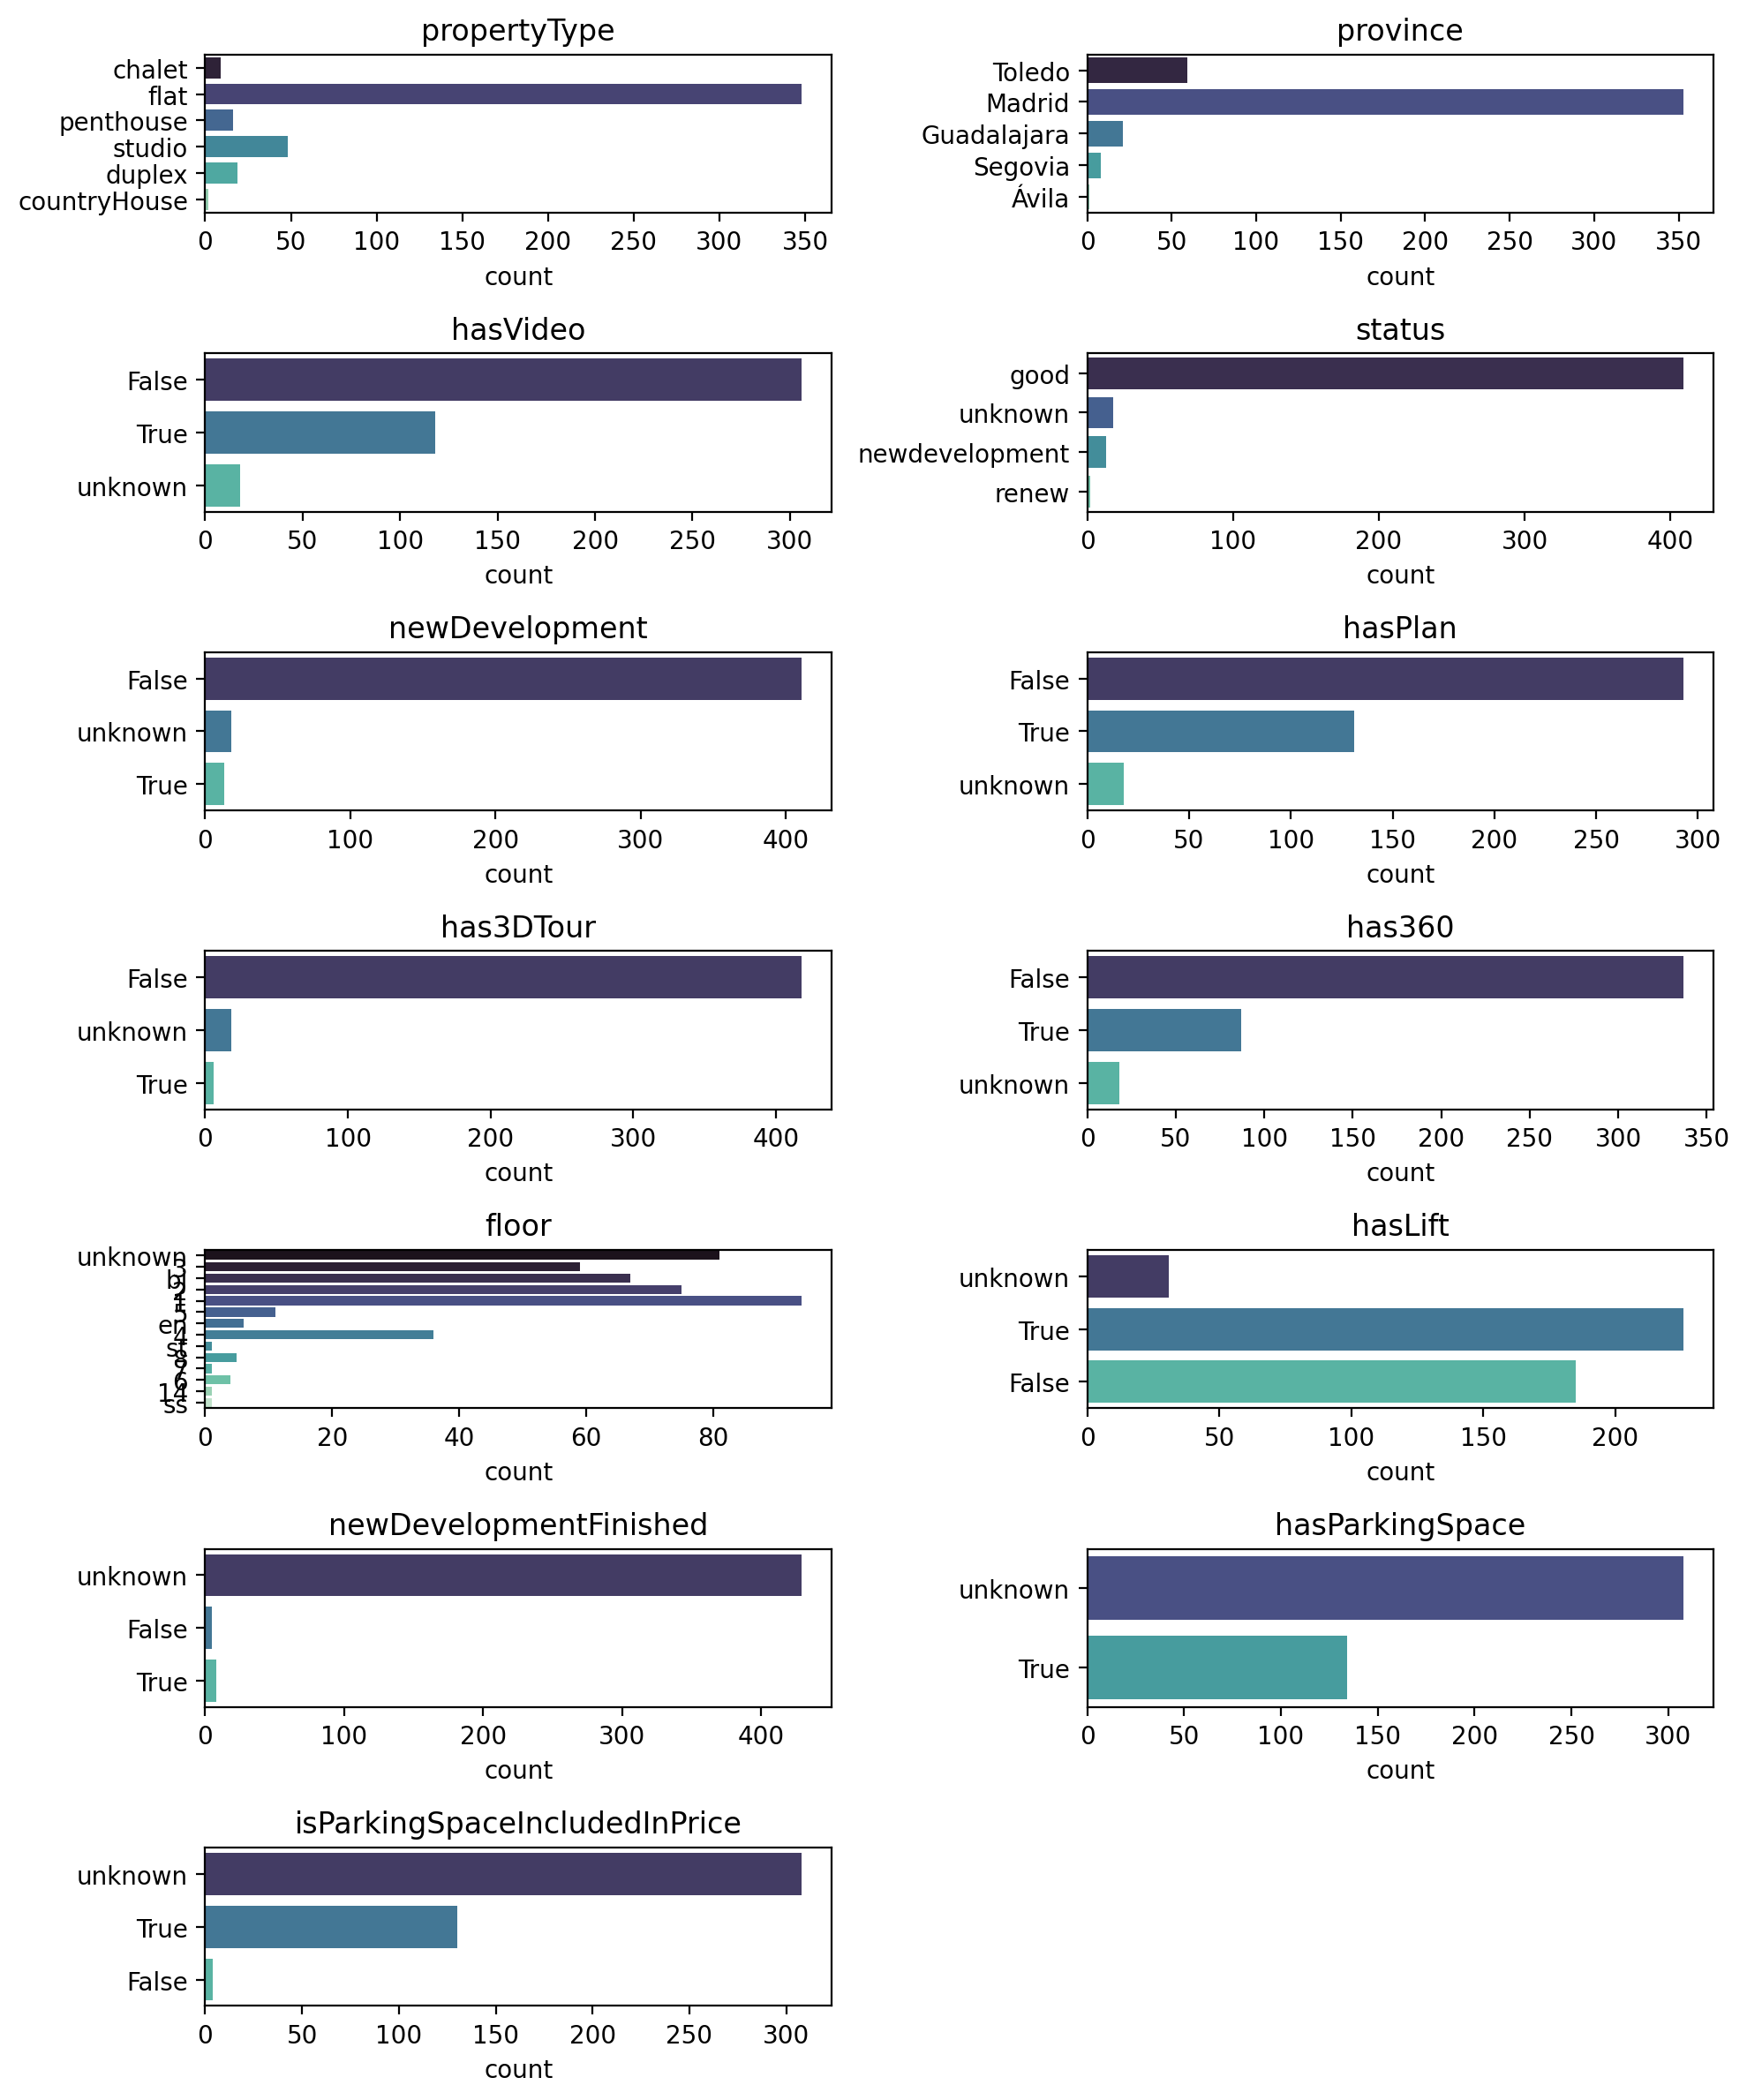

In [1165]:
ncol = 2
nrow = math.ceil(len(cat_cols_less20)/2)

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize = (10,12), dpi = 200)
axes = axes.flat
for i, col in enumerate(cat_cols_less20):
    sns.countplot(data = df, y = col, ax=axes[i], palette="mako")
    axes[i].set_ylabel("")
    axes[i].set_title(col)
if len(cat_cols_less20) != 0:
    plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Vemos con la gráfica que la categoría de `newDevelopmentFinished` tiene muy pocos valores que aporten info (True y False), por lo que no nos interesa mantenerla.

In [1166]:
df.drop(columns = "newDevelopmentFinished", inplace=True)

Ahora, con las que tienen más de 20 categorías:

In [1167]:
for col in cat_cols.drop(cat_cols_less20):
    print(df[col].nunique())
    display(df[col].value_counts(normalize=True).head())

96


municipality
Madrid               0.384615
Alcalá de Henares    0.049774
Parla                0.031674
Seseña               0.031674
Aranjuez             0.024887
Name: proportion, dtype: float64

97


district
unknown               0.246606
Centro                0.108597
Villaverde            0.052036
Puente de Vallecas    0.038462
El Quiñón             0.029412
Name: proportion, dtype: float64

75


neighborhood
unknown                 0.606335
Lavapiés-Embajadores    0.024887
Villaverde Alto         0.020362
San Diego               0.018100
Valdeacederas           0.018100
Name: proportion, dtype: float64

Definitivamente neighborhood no nos aporta información, más del 50% son nulos. Distrito tampoco nos es muy relevante, con casi un 25% de nulos. La única de la que podríamos dudar es la de municipios, ya que hay 96 valores únicos, pero no hay nulos. Por ahora la dejaremos, y a la hora de entrenar el modelo comprobaremos si nos genera over/under fitting.

In [1168]:
df.drop(columns = ["district", "neighborhood"], inplace=True)

También podemos comprobar las distribuciones de las variables numéricas.

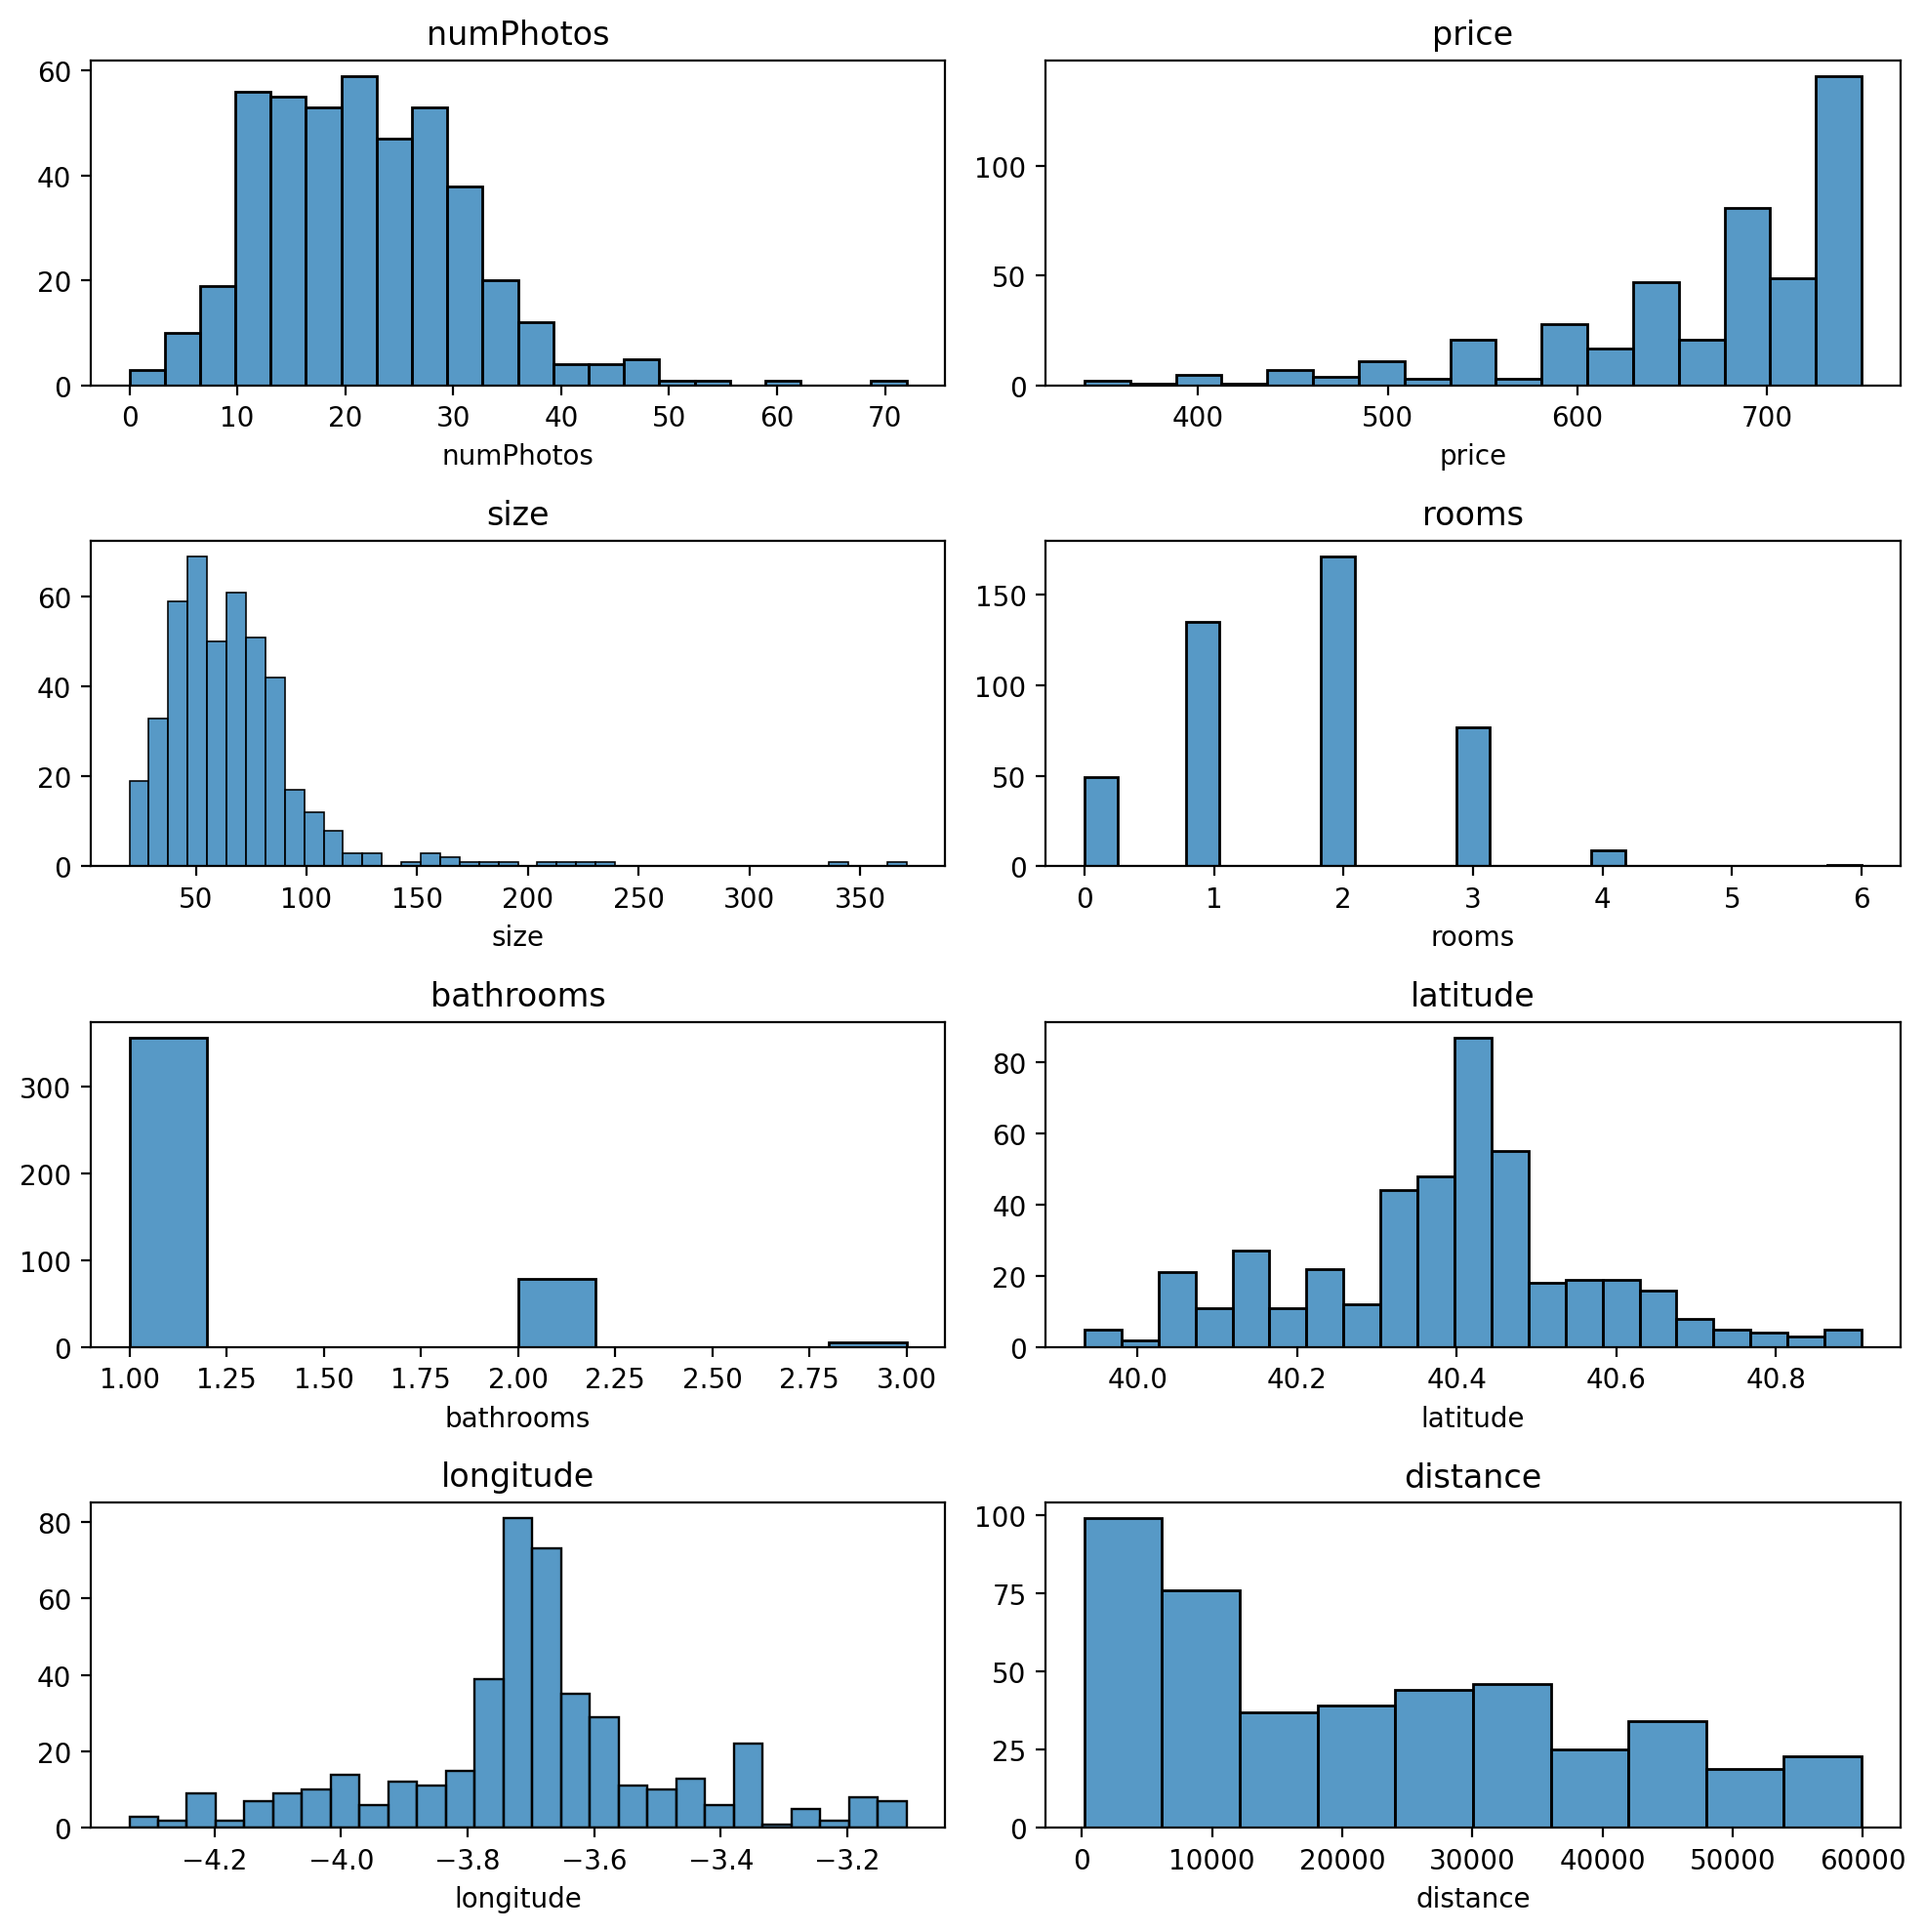

In [1169]:
ncol = 2
nrow = math.ceil(len(num_cols)/2)

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize = (10,10), dpi = 200)
axes = axes.flat
for i, col in enumerate(num_cols):
    sns.histplot(data = df, x = col, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_title(col)
if len(num_cols) == 0:
    plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Ya de un primer vistazo podemos ver varias cosas:
- La latitud y longitud se distribuyen de manera similar a una normal. Esto sucede porque hay una ubicación donde más se concentran las casas (seguramente Madrid).
- Hay algunas variables presuntamente numéricas, pero discretas, por lo que se podrían tomar como categóricas (rooms y bathrooms).

In [1171]:
df["bathrooms"] = df["bathrooms"].astype("object")
df["rooms"] = df["rooms"].astype("object")

In [1172]:
cat_cols = df.select_dtypes('O').columns
num_cols = df.select_dtypes('number').columns

Además vamos a guardar la latitud y longitud aparte, ya que no representan datos útiles en el análisis (teniendo en cuenta de que ya contamos con la distancia), pero puede servir para visualizar la ubicación de las viviendas más adelante.

In [1186]:
lat = df["latitude"]
long = df["longitude"]

In [1187]:
df.drop(columns = ["latitude", "longitude"], inplace=True)

Por último veamos la correlación entre las variables, para ver si hubiera alguna que representara lo mismo que otra, pudiendo así reducir nuestro número de variables.

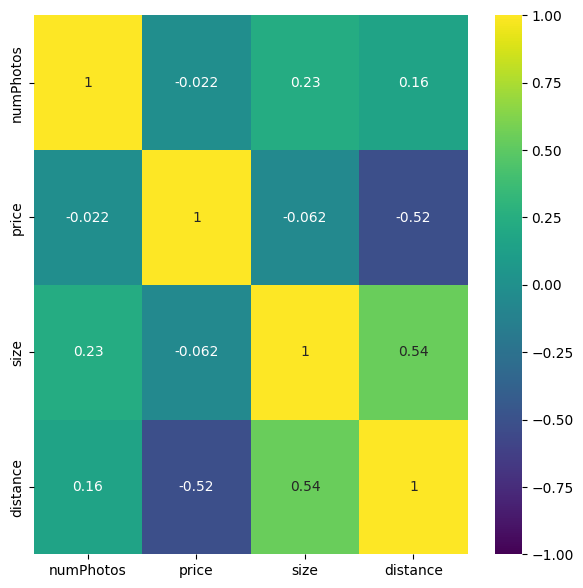

In [1188]:
plt.figure(figsize = (7,7), dpi = 100)
sns.heatmap(df.select_dtypes("number").corr(), vmin = -1, vmax = 1, annot=True, cmap="viridis")
plt.show()

No vemos ninguna que esté muy correlacionada con otra. La que presenta mayor correlación es la distancia con el tamaño, por lo que cuanto más lejos del centro, más grande suele ser la vivienda. Otra con bastante correlación es el precio con la distancia, viendo que a mayor cercanía al centro mayor es el precio, lo cual tiene sentido.